# **PyTorch Introduction**

## **Introduction to PyTorch**
PyTorch is a deep learning library that enables developers to build and train neural networks with flexibility and ease. It provides tools to create tensors, define computational graphs, and run models on GPUs for faster computation.

### **Installing PyTorch**
Before diving into PyTorch, we need to install it. You can install it using `pip`:
```bash
pip install torch torchvision
```
or refer <a>https://pytorch.org/get-started/locally/</a>

### **Importing Libraries**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## **PyTorch Basics**

### **Tensors**
Tensors are the core data structure in PyTorch. They are similar to NumPy arrays but with the advantage of being able to run on GPUs.

#### **Creating Tensors**

In [2]:
# Creating a tensor
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x)

# Creating a tensor of zeros
x_zeros = torch.zeros((2, 3))
print(x_zeros)

# Creating a tensor of random values
x_rand = torch.rand((2, 3))
print(x_rand)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.9090, 0.6202, 0.3061],
        [0.6875, 0.4972, 0.4581]])


#### **Tensor Operations**

In [5]:
# Basic operations
y = torch.tensor([[1, 1, 1], [2, 2, 2]])
result = x + y
print(result)

# Matrix multiplication
result_mul = torch.matmul(x, y.T)
print(result_mul)

# Reshaping a tensor
x_reshaped = x.view(3, 2)
print(x_reshaped)

tensor([[2, 3, 4],
        [6, 7, 8]])
tensor([[ 6, 12],
        [15, 30]])
tensor([[1, 2],
        [3, 4],
        [5, 6]])


### **GPU Acceleration**
If you have a GPU, you can easily move tensors to the GPU for faster computations.

In [6]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Moving tensor to GPU
x_gpu = x.to(device)
print(x_gpu)

tensor([[1, 2, 3],
        [4, 5, 6]], device='cuda:0')


## **Building a Simple Neural Network**

### **Defining a Model**
In PyTorch, models are defined using the `nn.Module` class. Let's create a simple neural network for image classification.

In [7]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__(),

        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_size)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### **Loss Function and Optimizer**
To train the model, we need to define a loss function and an optimizer. PyTorch provides several options, and we will use Cross Entropy Loss and the SGD optimizer.

In [8]:
# Initialize model, loss function, and optimizer
model = SimpleNN(input_size=28*28, output_size=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

## **Training the Neural Network**

### **Loading Data**
We will use the MNIST dataset for training, which consists of 28x28 grayscale images of handwritten digits. PyTorch provides `torchvision.datasets` to handle datasets.

In [9]:
# Load the dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 2729832.45it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 246041.23it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 1959502.43it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4036128.98it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### **Training Loop**
The training loop involves iterating over the dataset, performing forward passes, calculating loss, and updating model parameters using backpropagation.

In [10]:
# Training loop
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Flatten the images
        images = images.view(images.shape[0], -1)
        
        # Forward prop
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Compute gradients and update weights (Backward propagation)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

Epoch [1/5], Loss: 0.2865
Epoch [2/5], Loss: 0.1177
Epoch [3/5], Loss: 0.0796
Epoch [4/5], Loss: 0.0614
Epoch [5/5], Loss: 0.0464


## **Evaluating the Model**
After training, we need to evaluate the model on the test data.

In [11]:
# Evaluate the model
model.eval()  # Set model to evaluation mode (We mentioned at the class but read the document again for why we use it.)
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(images.shape[0], -1)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 97.65%


## **Visualizing Results**
### **Visualizing Predictions**
We can visualize some of the model's predictions along with the actual labels.

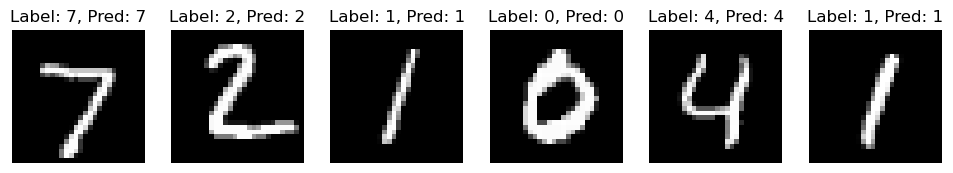

In [12]:
# Get some test images and labels
images, labels = next(iter(test_loader))

# Predict the labels
images_flat = images.view(images.shape[0], -1)
outputs = model(images_flat)
_, predictions = torch.max(outputs, 1)

# Visualize images with predicted labels
fig, axes = plt.subplots(1, 6, figsize=(12, 6))
for i in range(6):
    ax = axes[i]
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f'Label: {labels[i]}, Pred: {predictions[i]}')
    ax.axis('off')
plt.show()

## **Saving and Loading Models**
Once a model is trained, it's important to save it for future use.

In [ ]:
# Save the model
torch.save(model.state_dict(), 'simple_nn.pth')

# Load the model
model = SimpleNN()
model.load_state_dict(torch.load('simple_nn.pth'))
model.eval()